# PHASE 3 PROJECT: CHICAGO CAR CRASHES ANALYSIS
* Student's Name: Josiah Okumu
* Student's Type: Full-time (Virtual)
* Due Date:24th May, 2023
* Instructor's Name: Samwel Karu
* Blog post URL: https://github.com/josiah-okumu/phase-3-project

# BUSINESS UNDERSTANDING

## Overview
My client is the Vehicle Safety Board, interested in reducing the accident cases in the city of Chicago. The board is looking into helping the car manufacturers and buyers to equally feel safer on the roads. This software would be used to identify the leading causes of death in the city of Chicago and save the lives of the car occupants, including the driver. The software would be able to recognize the prevailing situation at the time of accidents and compares it with the previous crashes, notifying the board of a possible fatality on a specific area. the classification model created in this case will predict the prime factors causing an accident and whether the accident is fatal. If successfully implemented by the Vehicle Safety Board, they will raise awareness to the road users within the city on the possible causes of death, how to evade them to reduce fatality risks and improve safety of the road users.

## Business Problem
My client, Vehicle Safety Board wants to know hoe they can identify and reduce crashes that happens within the city. This will inform their cause of action based on the outcome of the major causes of accidents and how fatal they are. The board seeks to know to prevent the fatal crashes on the roads, so that it does a recommendation to the government on ways of reducing the crashes that happens within the city of Chicago.

## Objectives
* To provide inferential statistics and visualisations based on this data.
* To build a classification predictive and supervised learning models from the data to predict causes of crash and how to prevent crashes on the roads

## Data Understanding
My stakeholder, the Vehicle Safety Board is set to launch campaign that is aimed at reducing car crashes along the roads. The task in this case is to build a classification model to identify the major causes of car crashes and how to prevent the fatalities of these crashes when they happen, group them as preventable or non-preventable, based on the monetary implication involved in abating the cause of the crash.
## Data Sets
The dataset that was used for these purpose a realtime data that is recorded and released by the different police departments within the city of Chicago. I used three datasets;Traffic Crashes- Crashes, Traffic Crashes-People and Traffic Crashes-Vehicle, whose sources are as follows:

Crashes: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Vehicle: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

People: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

## Important Libraries for Use

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score

from sklearn.ensemble import RandomForestClassifier




## Loading the Datasets

In [2]:
pd.set_option('display.max_columns', None)
df1=pd.read_csv('/home/moringa/Desktop/phase 3 project/Traffic_Crashes_-_Vehicles.csv.crdownload',low_memory=False)
df2=pd.read_csv('/home/moringa/Desktop/phase 3 project/Traffic_Crashes_-_People.csv.crdownload', low_memory=False)
df3=pd.read_csv('/home/moringa/Desktop/phase 3 project/Traffic_Crashes_-_Crashes.csv', low_memory=False)

## DATA UNDERSTANDING AND PREPARATION

Join the three datasets together before cleaning the combined dataset based on the features that might be required for use

In [3]:
df=pd.concat([df1,df2,df3],axis=1)

View the first five rows in the dataset

In [4]:
df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1.0,DRIVER,NaN,1478881,NaN,FORD,TRANSIT,IL,2020.0,UNKNOWN,VAN/MINI-VAN,OTHER,S,CHANGING LANES,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,TOTAL (ALL AREAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536.0,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1.0,DRIVER,NaN,834816,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,792b539deaaad65ee5b4a9691d927a34d298eb33

View the last five rows, the tail of the dataframe

In [5]:
df.tail()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
639461,617164,8ababe8bbab9201cbaee4157e8dd8825175d1fb2b53d52...,JC210179,03/16/2019 04:20:00 PM,2.0,DRIVER,NaN,5{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639462,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639463,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

The shape of the combined dataset is very huge, 639466 rows with 151 features to be used in the analysis.

In [6]:
df.shape

(639466, 151)

Learn more about the dataset, including column names and the total entries available

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639466 entries, 0 to 639465
Columns: 151 entries, CRASH_UNIT_ID to LOCATION
dtypes: float64(31), object(120)
memory usage: 736.7+ MB


In [8]:
df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       ...
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object', length=151)

In [9]:
df.describe

<bound method NDFrame.describe of                          CRASH_UNIT_ID  \
0                              1554880   
1                               749947   
2                               749949   
3                               749950   
4                              1554881   
...                                ...   
639461                          617164   
639462                  "error" : true   
639463    "message" : "Internal error"   
639464                  "status" : 500   
639465                               }   

                                          CRASH_RECORD_ID     RD_NO  \
0       91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...  JG223284   
1       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
2       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
3       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
4       91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...  JG223284   
...                                

Checking for the duplicated values from the dataset showed that duplicates were many in the combined datasets.

In [10]:
df.duplicated

<bound method DataFrame.duplicated of                          CRASH_UNIT_ID  \
0                              1554880   
1                               749947   
2                               749949   
3                               749950   
4                              1554881   
...                                ...   
639461                          617164   
639462                  "error" : true   
639463    "message" : "Internal error"   
639464                  "status" : 500   
639465                               }   

                                          CRASH_RECORD_ID     RD_NO  \
0       91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...  JG223284   
1       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
2       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
3       81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...  JC451435   
4       91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...  JG223284   
...                            

### Cleaning 

Drop the duplicated features fom the dataset trims the dataset greatly but leaves the data with no duplicates.

In [11]:
# Drop the duplicates by checking the CRASH_RECORD_ID for the uniqueness)
df_dropped= df.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')

In [12]:
# Print out the new shape and head of the dataset formed after dropping the duplicates.
print(df_dropped.shape)
df_dropped.head()

(549060, 151)


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,1554880,91a5d08b2b701f2d37cbb52ecdbeb09579bc7f2ebc60b3...,JG223284,04/14/2023 02:05:00 PM,1.0,DRIVER,NaN,1478881,NaN,FORD,TRANSIT,IL,2020.0,UNKNOWN,VAN/MINI-VAN,OTHER,S,CHANGING LANES,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,TOTAL (ALL AREAS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30.0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.0,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536.0,W,RANDOLPH ST,121.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,14.0,2.0,3.0,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1.0,DRIVER,NaN,834816,NaN,HONDA,CIVIC,IL,2016.0,UNKNOWN,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,792b539deaaad65ee5b4a9691d927a34d298eb33

After dropping the duplicate from the dataset, it is still huge to be used in such an analysis and hence the need for feature selection at this point so that I only concentrate on the features picked, clean them and use them to analyse the data and use these features in my predictive model

### Feature Selection/Engineering

To understand how drivers get involved in accidents and some of the cuases of such incidents, I dropped columns which are not driver related, not having the mention of the driver and also limiting it to specific cars that are within a period of up to 24 years old. This gives the new columns which are to be used in the analysis of this case and used for modeling purposes.

In [13]:
# Restrict the features to only accidents with the driver.
df_dr = df_dropped[df_dropped['PERSON_TYPE']=='DRIVER']
df_dr = df_dr[(df_dr.VEHICLE_YEAR>=2000) & (df_dr.VEHICLE_YEAR <=2021)]

#The necessary and new columns to be used due to their low correlation.
new_columns = ['AGE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT',
           'WEATHER_CONDITION','LIGHTING_CONDITION','TRAFFIC_CONTROL_DEVICE',
           'PHYSICAL_CONDITION','VEHICLE_DEFECT', 'LONGITUDE', 'LATITUDE','INJURIES_FATAL']

#The dataframe with the new columns
df_dr = df_dr[new_columns]

In [14]:
#Further drop missing values in these columns
df_dr.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_dr.dropna(axis=0, subset=['LONGITUDE'], inplace =True)

Further, eliminate the unclear values still contained in the data as stated below;

In [15]:
# From the weather conditions column, remove weather conditions values that are either unknown or don't make sense
df_dr = df_dr[(df_dr.WEATHER_CONDITION != 'UNKNOWN')|
                      (df_dr.WEATHER_CONDITION != 'OTHER')|
                      (df_dr.WEATHER_CONDITION != 'BLOWING SAND, SOIL, DIRT')]
# Remove other unknowns still left from the different columns to be used;
df_dr = df_dr[df_dr.LIGHTING_CONDITION != 'UNKNOWN']
df_dr = df_dr[(df_dr.TRAFFIC_CONTROL_DEVICE != 'UNKNOWN')|(df_dr.TRAFFIC_CONTROL_DEVICE != 'OTHER')]
df_dr = df_dr[(df_dr.PHYSICAL_CONDITION != 'UNKNOWN')|(df_dr.PHYSICAL_CONDITION != 'OTHER')]

In [16]:
# To know the severity, an accident is classified as fatal or not converting this to either true/false
df_dr.INJURIES_FATAL.replace({0.0:0, 1.0:1, 2.0:1, 3.0:1, 4.0:1}, inplace=True)
# Replace the unknown ages with the median age of the drivers
df_dr.AGE.replace({np.NAN: df_dr.AGE.median()},inplace=True)

New data size attained after cleaning of the features selected for analysis

In [17]:
# The shape of the new dataset formed 
df_dr.shape

(221617, 13)

In [18]:
# Key columns left after cleaning and that can be used for prediction. 
df_dr.columns

Index(['AGE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFIC_CONTROL_DEVICE', 'PHYSICAL_CONDITION', 'VEHICLE_DEFECT',
       'LONGITUDE', 'LATITUDE', 'INJURIES_FATAL'],
      dtype='object')

For these selected features, fill in the still missing values for completeness before being subjected to the model

In [19]:
# Fill the null values with a zero
df_dr1 = df_dr.fillna(0)

Convert categorical data to numerical data

In [20]:
# Conversion of categorical values to numerical representation
df_last = df_dr1.apply(lambda x: pd.factorize(x)[0])


Store the data features into different variables, X and y

In [21]:
# Split the data into dependent and independent variables
X = df_last.drop('INJURIES_FATAL',axis=1)
y = df_last.INJURIES_FATAL

In [22]:
# The new columns available for use
df_last.columns

Index(['AGE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFIC_CONTROL_DEVICE', 'PHYSICAL_CONDITION', 'VEHICLE_DEFECT',
       'LONGITUDE', 'LATITUDE', 'INJURIES_FATAL'],
      dtype='object')

In [23]:
# Convert the columns to be used into lower case
df_last = df_last.columns.str.lower()

### EXPLORATORY DATA ANALYSIS 

Check the distribution of the selected columns 

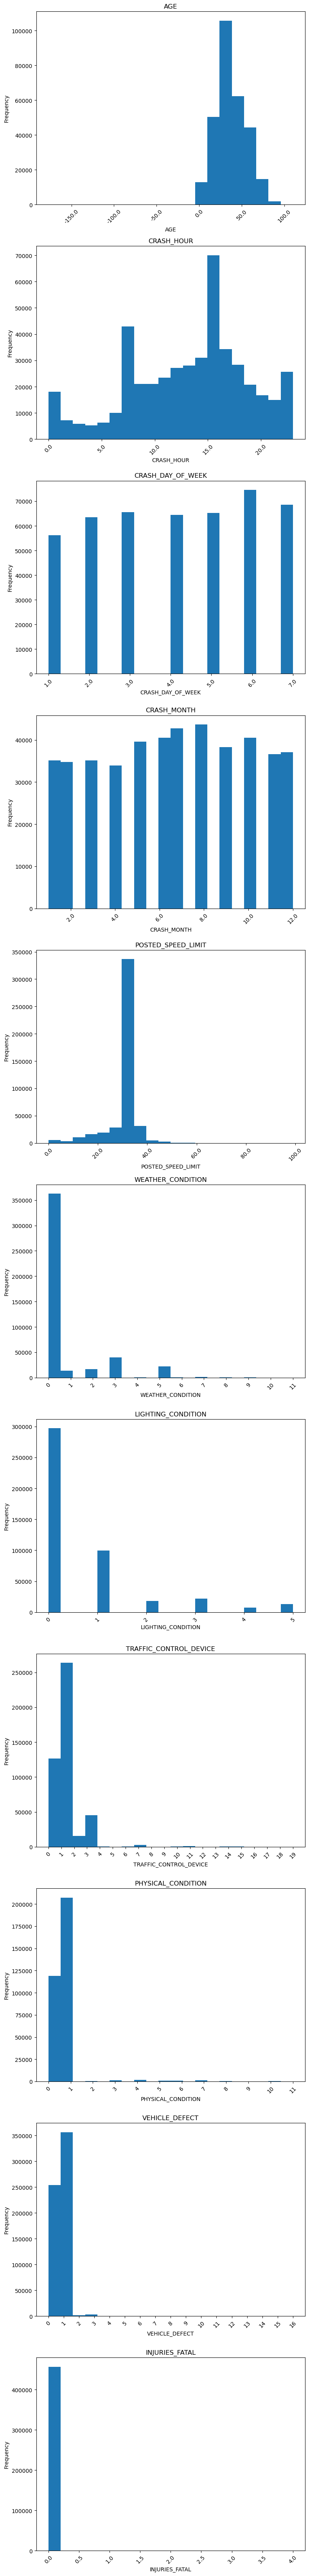

In [24]:
def plot_histogram(df, columns):
    fig, axes = plt.subplots(len(columns), figsize=(8, 6 * len(columns)))
    
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.hist(df[column].dropna(), bins=20)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        # Incline x-labels by 45 degrees
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

    plt.tight_layout()
    plt.show()


# The dataframe named 'df'  and has these specified columns
columns_to_plot = ['AGE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
                   'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                   'TRAFFIC_CONTROL_DEVICE', 'PHYSICAL_CONDITION', 'VEHICLE_DEFECT',
                   'INJURIES_FATAL']

plot_histogram(df, columns_to_plot)


### Observations
The data for the age column seems to be normally distributed. The majority of the drivers causing accidents are below the age of 50 years. Further, it is evident that of the many crashes that happens in chicago are many but few are categorized as fatal. At the same time,in most cases, crashes/accidents are associated with bad roads, weather, rules and regulations, just to mention but a few. Using these selected features, nearly every vehicles that gets involved in crashes are either in good working condition and are mostly taking place in abroad day light. This rules out the causes to be bad vicinity and brings about other factors like the poor state of the roads, hour of the day and day of the week. accidents tends to be many towards the weekend and highly rampant from around midmorning into the night.

Plotting a heatmap to show the correlation between the various variables being considered, the results shows no feature is highly correlated with one another, except for latitudes and longitudes and thus no multi-colinearity expected.

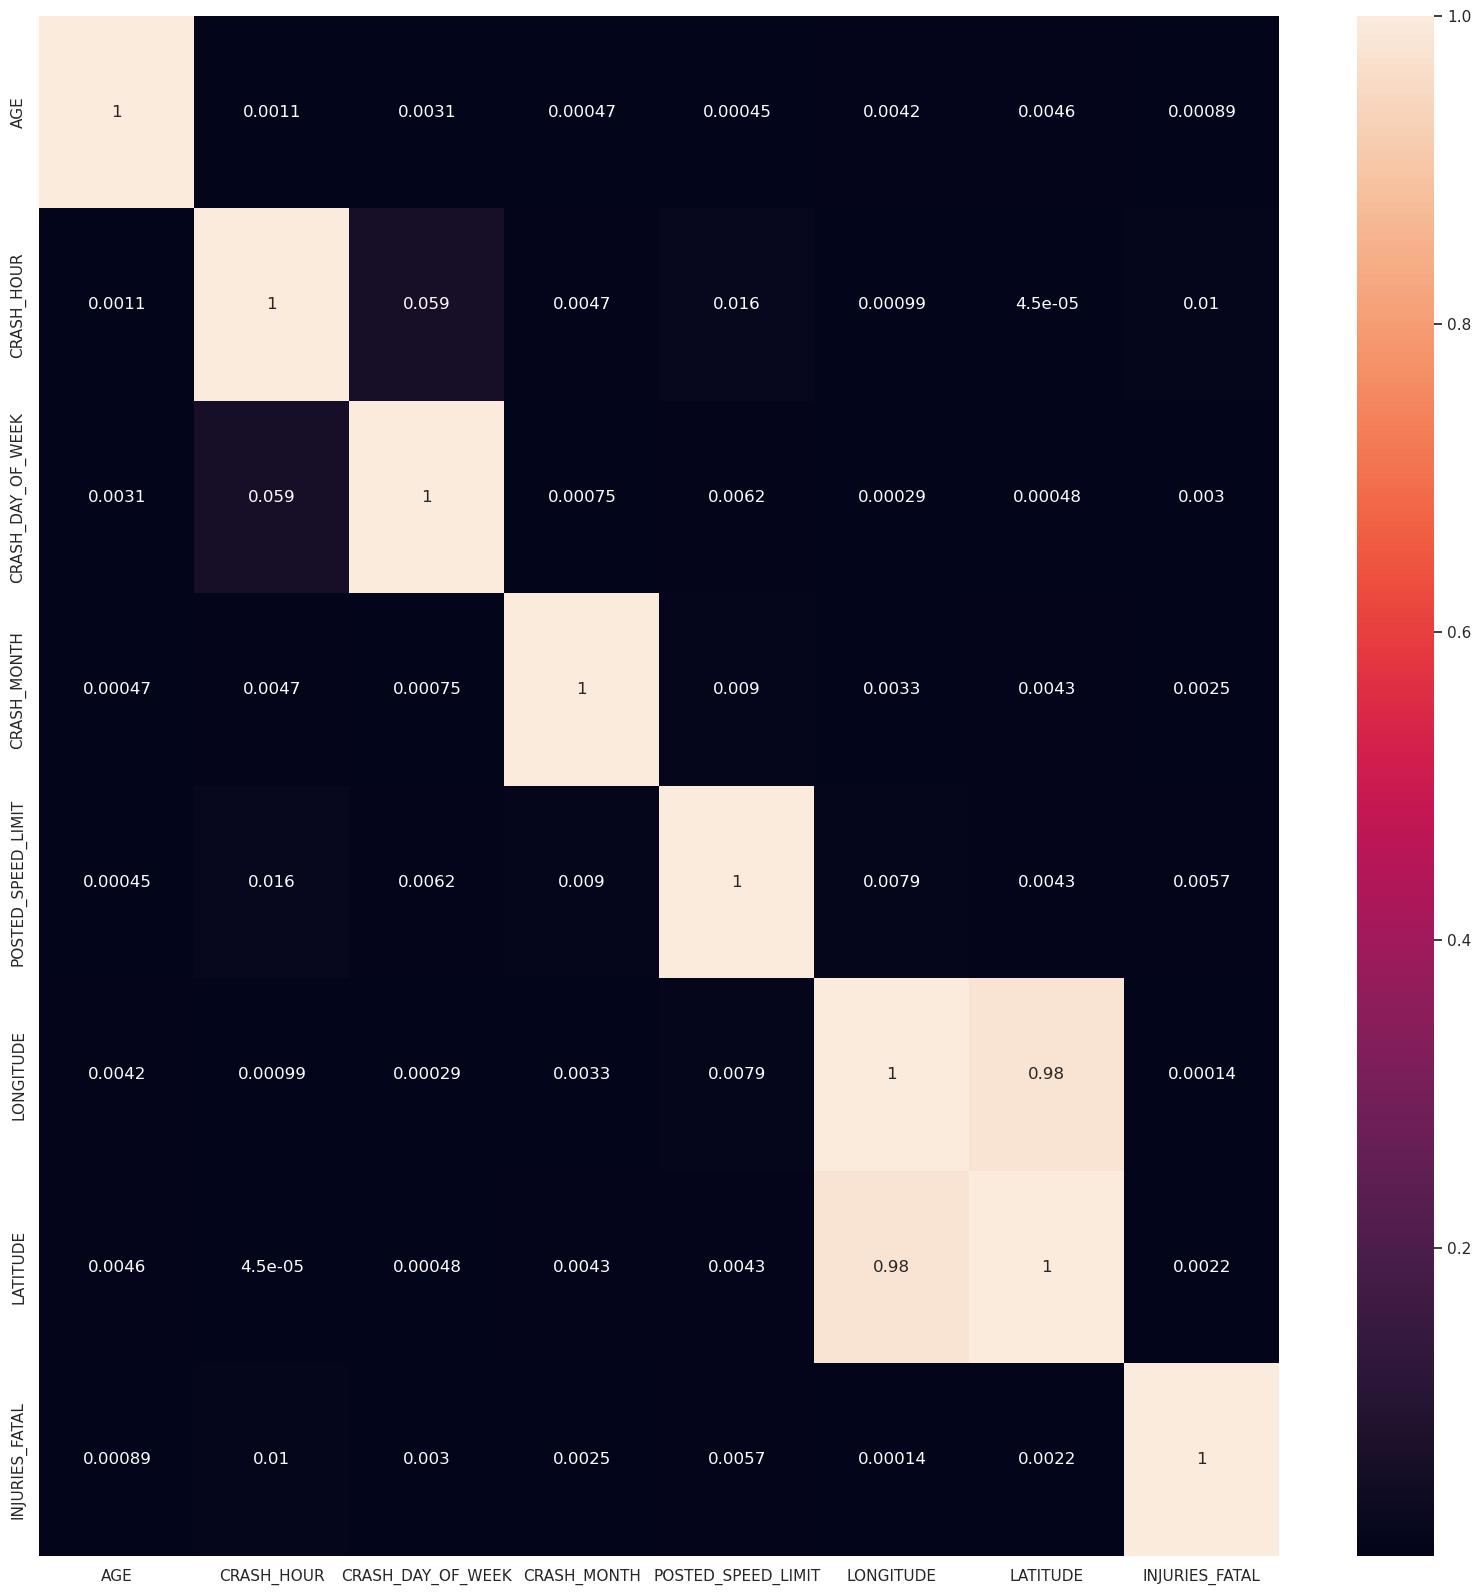

In [25]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df_dr.corr().abs(),annot=True);

Dropping the highly correlated features from the above heatmap table. Longitudes and latitudes are highly correlated and hence are being dropped to ease multicollinearity in the analysis.

In [26]:
abs(df_dr.corr()) > .9

,AGE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,POSTED_SPEED_LIMIT,LONGITUDE,LATITUDE,INJURIES_FATAL
AGE,True,False,False,False,False,False,False,False
CRASH_HOUR,False,True,False,False,False,False,False,False
CRASH_DAY_OF_WEEK,False,False,True,False,False,False,False,False
CRASH_MONTH,False,False,False,True,False,False,False,False
POSTED_SPEED_LIMIT,False,False,False,False,True,False,False,False
LONGITUDE,False,False,False,False,False,True,True,False
LATITUDE,False,False,False,False,False,True,True,False
INJURIES_FATAL,False,False,False,False,False,False,False,True


Check for normality in the numerical columns of the dataset

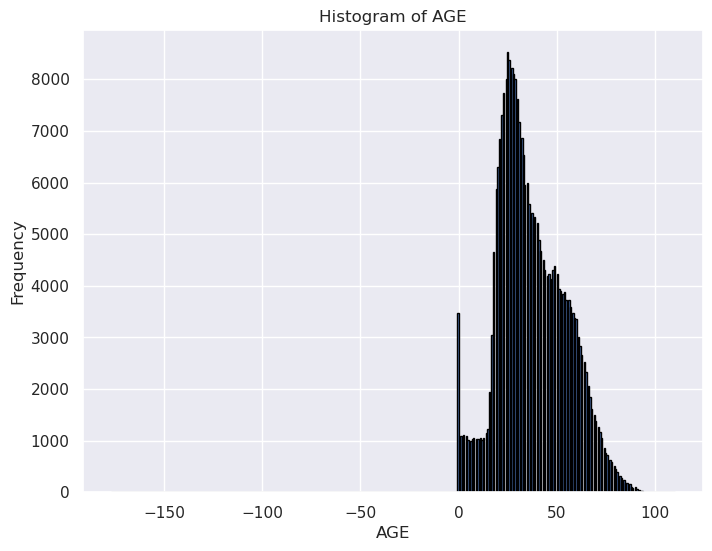

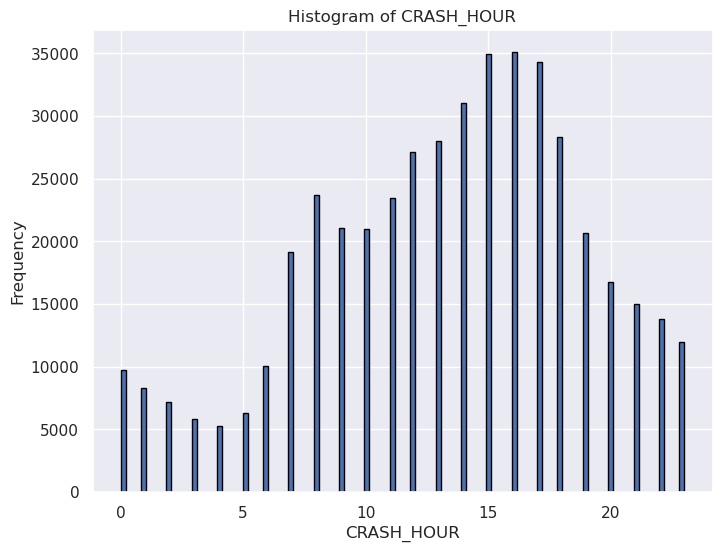

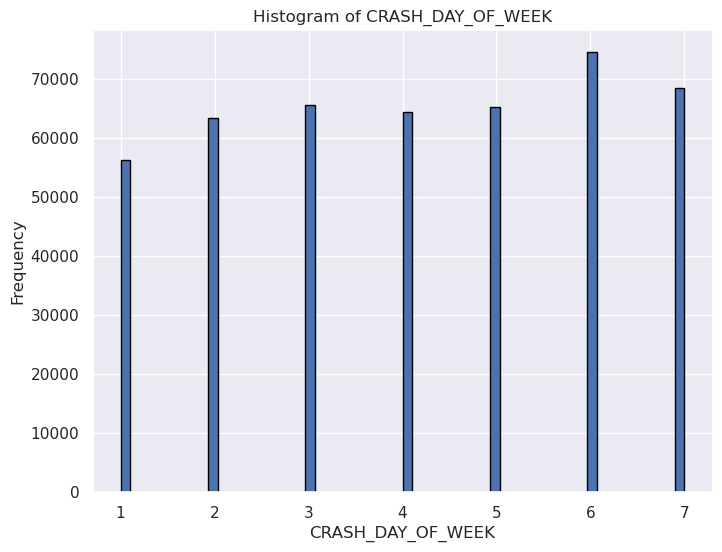

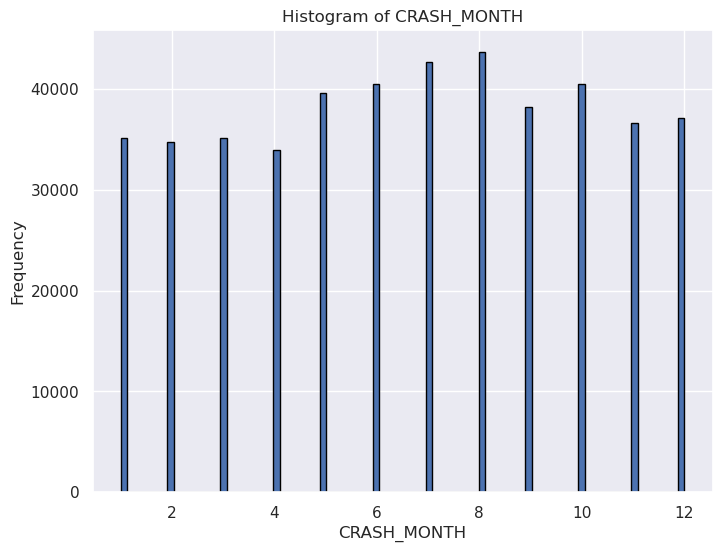

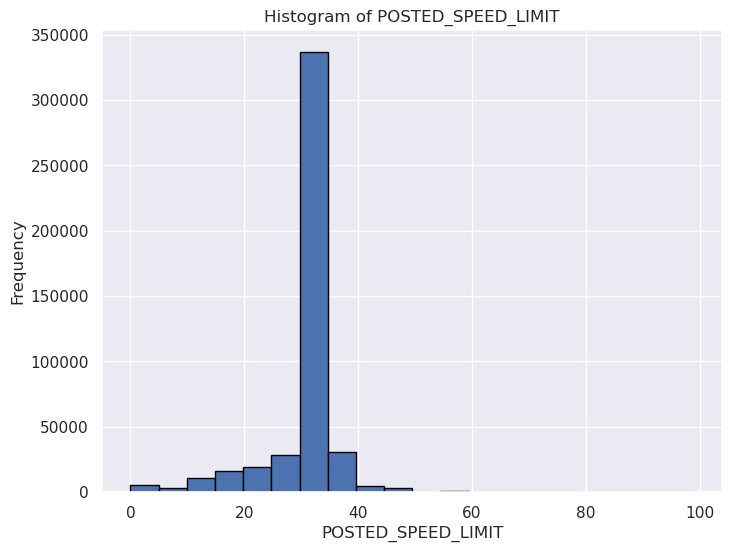

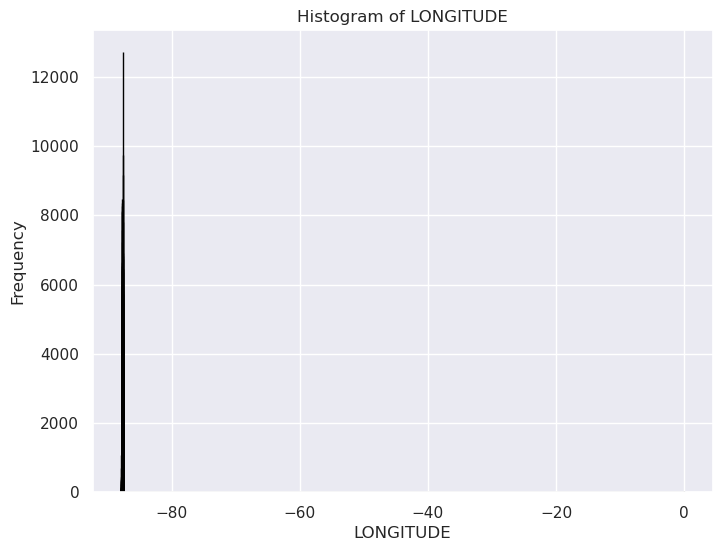

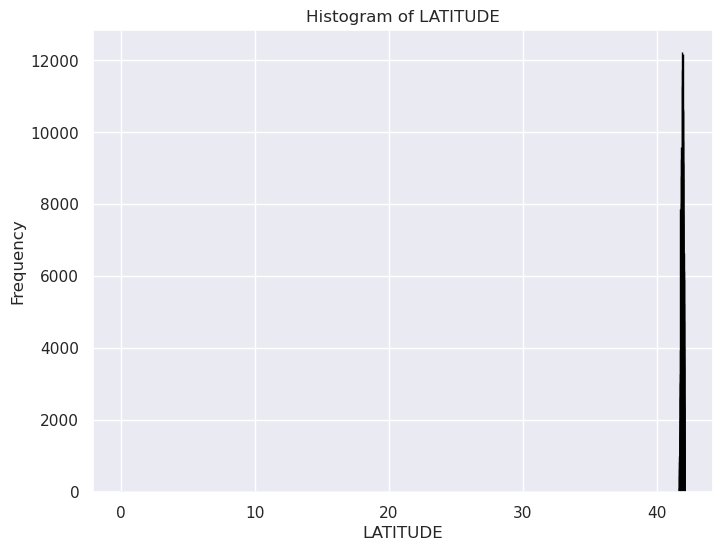

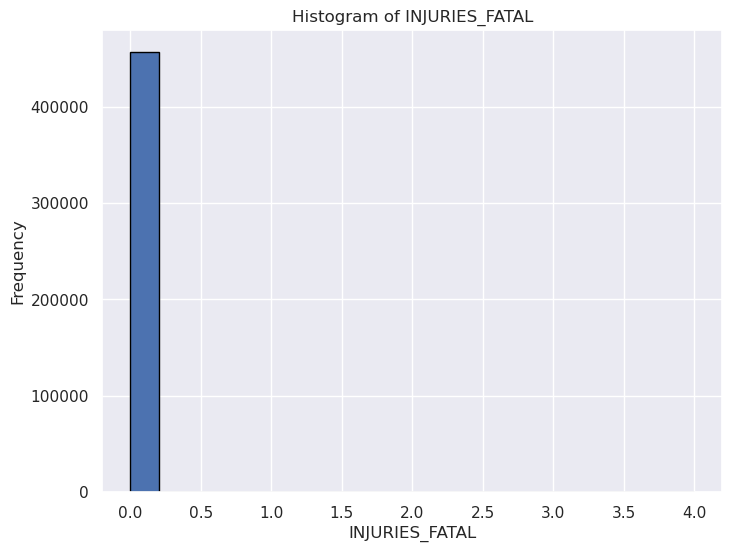

In [27]:
# Numerical columns: Histograms
numerical_columns = df_dr.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins='auto', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

#### Observations
Looking at the above distributions, it is clear that all the features seems to have obeyed normal distribution, except age and posted speed limit which are not purely normally distributed. However, it is important to note that these two features are slightly skewed to the left, maybe due to their continuous nature.

#### Train test split

Split the dataset into train and test sets so that we can sample the data to be used for training the model and then the remaining to be used for testing of the model. This division took the $80$:$20$

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#### Scaling Numerical Parameters

In [29]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_dr[columns].values.reshape(-1,1))

for i in df_dr.select_dtypes(include=[np.number]).columns:
    df_dr[i] = scaling(i)
df_dr.head()

,AGE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,PHYSICAL_CONDITION,VEHICLE_DEFECT,LONGITUDE,LATITUDE,INJURIES_FATAL
0,0.721429,0.608696,0.166667,0.181818,0.303030,CLEAR,DAYLIGHT,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,0.003336,0.996711,0.0
1,0.764286,0.347826,0.500000,0.727273,0.303030,CLEAR,DAYLIGHT,NO CONTROLS,NORMAL,UNKNOWN,0.002204,0.998710,0.0
2,0.764286,0.000000,0.833333,0.545455,0.303030,CLEAR,"DARKNESS, LIGHTED ROAD",UNKNOWN,UNKNOWN,NONE,0.002483,0.996753,0.0
3,0.764286,0.782609,0.833333,0.545455,0.303030,CLEAR,DAYLIGHT,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,0.003031,0.997676,0.0
5,0.764286,0.826087,0.000000,0.545455,0.252525,CLEAR,DAYLIGHT,NO CONTROLS,UNKNOWN,NONE,0.002732,0.994285,0.0


In [30]:
#Onehotencoding for the train test
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums_train = ohe.fit_transform(X_train_cat)
dums_train_df = pd.DataFrame(dums_train, index=X_train_cat.index)

nums_train_df = X_train.select_dtypes(['int64','float64'])

X_train_clean = pd.concat([nums_train_df, dums_train_df], axis=1)

In [31]:
#Onehotencoding the test set data
X_test_cat = X_test.select_dtypes('object')

dums_test = ohe.transform(X_test_cat)
dums_test_df = pd.DataFrame(dums_test,index=X_test_cat.index)

nums_test_df = X_test.select_dtypes(['int64','float64'])

X_test_clean = pd.concat([nums_test_df, dums_test_df], axis=1)

# MODELLING

### Dummy Classifier
This is the baseline model in this analysis that is to be compared with decision tree model

In [32]:
dummy = DummyClassifier(random_state=42) 

# Establish random_state for the sake of reproducibility of the results
dummy.fit(X_train_clean, y_train)
y_pred = dummy.predict(X_test_clean)

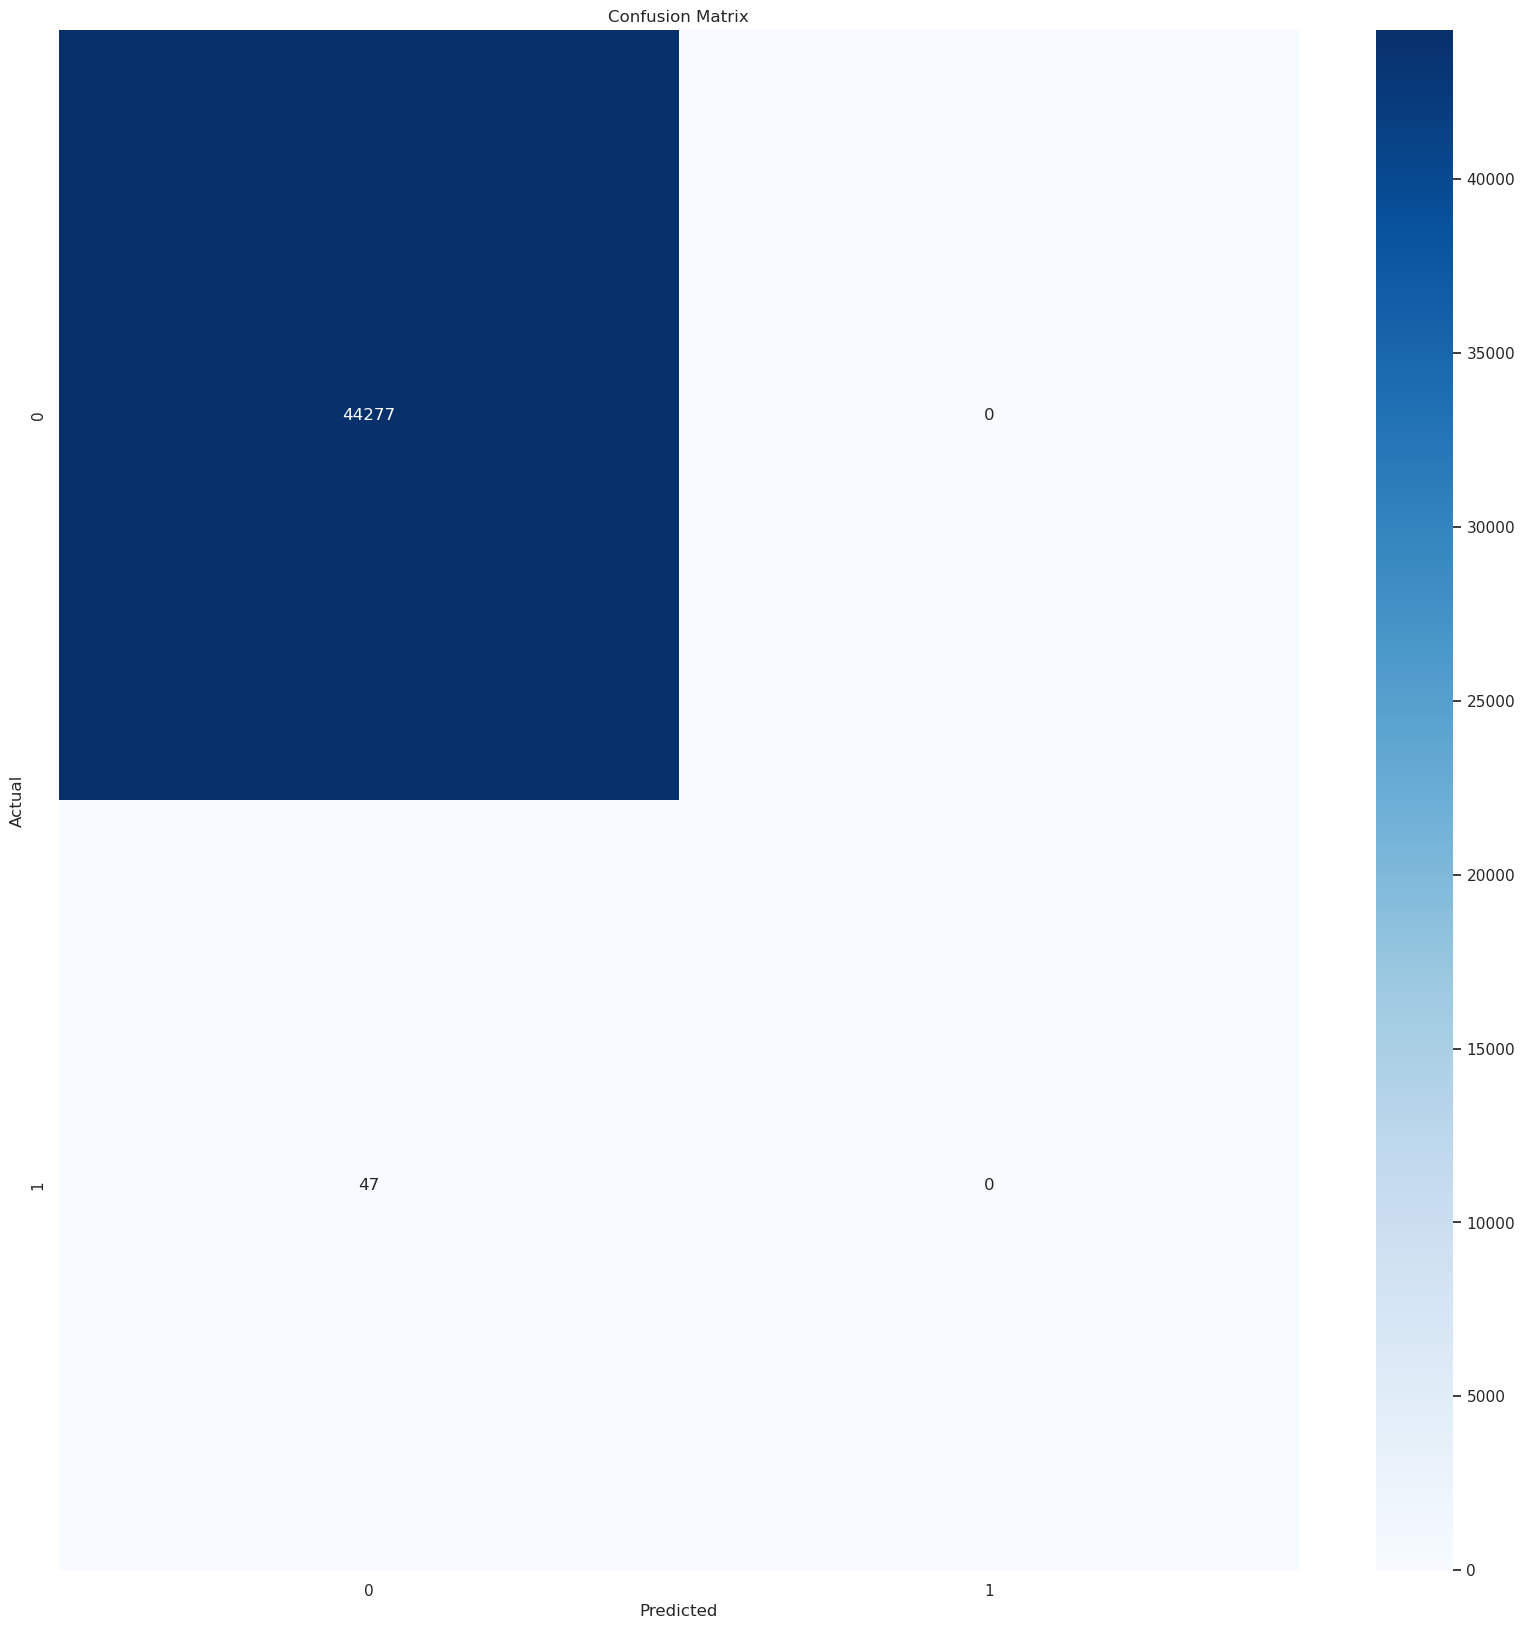

In [33]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Normalize the y_train set
y_train.value_counts(normalize=True)

0    0.99899
1    0.00101
Name: INJURIES_FATAL, dtype: float64

In [35]:
# print the accuracy of the model
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9989396263875101


#### Decision Tree

This is the second that is to be used in evaluating the performance of the baseline model previously used. The accuracy of this will be compared to the baseline model and then compared to the baseline model to evaluate that which performs better than the other.

In [36]:
tree = DecisionTreeClassifier()

In [37]:
tree_grid = {'max_leaf_nodes': [4, 5, 6, 7], 
             'min_samples_split': [2, 3, 4],
             'max_depth': [2, 3, 4, 5],
            }

In [38]:
tree_grid_search = GridSearchCV(tree, tree_grid, cv=5)

In [39]:
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4]})

In [40]:
tree_grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [41]:
tree_grid_search.best_score_

0.9989903719655434

In [42]:
tree_grid_search.best_estimator_.score(X_test_clean, y_test)

0.9989396263875101

In [43]:
best_tree = tree_grid_search.best_estimator_

In [44]:
tree_test_preds = best_tree.predict(X_test_clean)

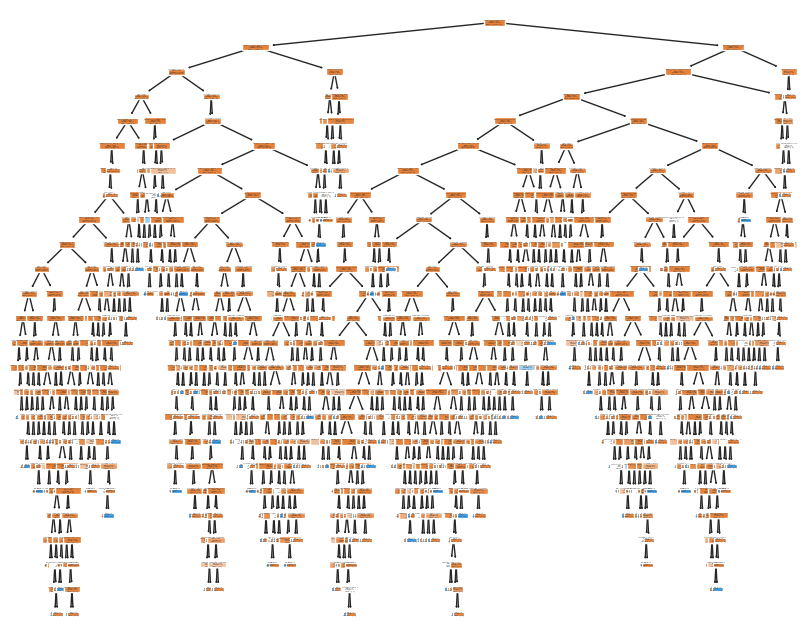

In [45]:
clf = DecisionTreeClassifier(random_state=42)
import matplotlib.pyplot as plt
from sklearn import tree

clf.fit(X, y)
# Assuming you have a trained decision tree classifier called 'classifier'
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

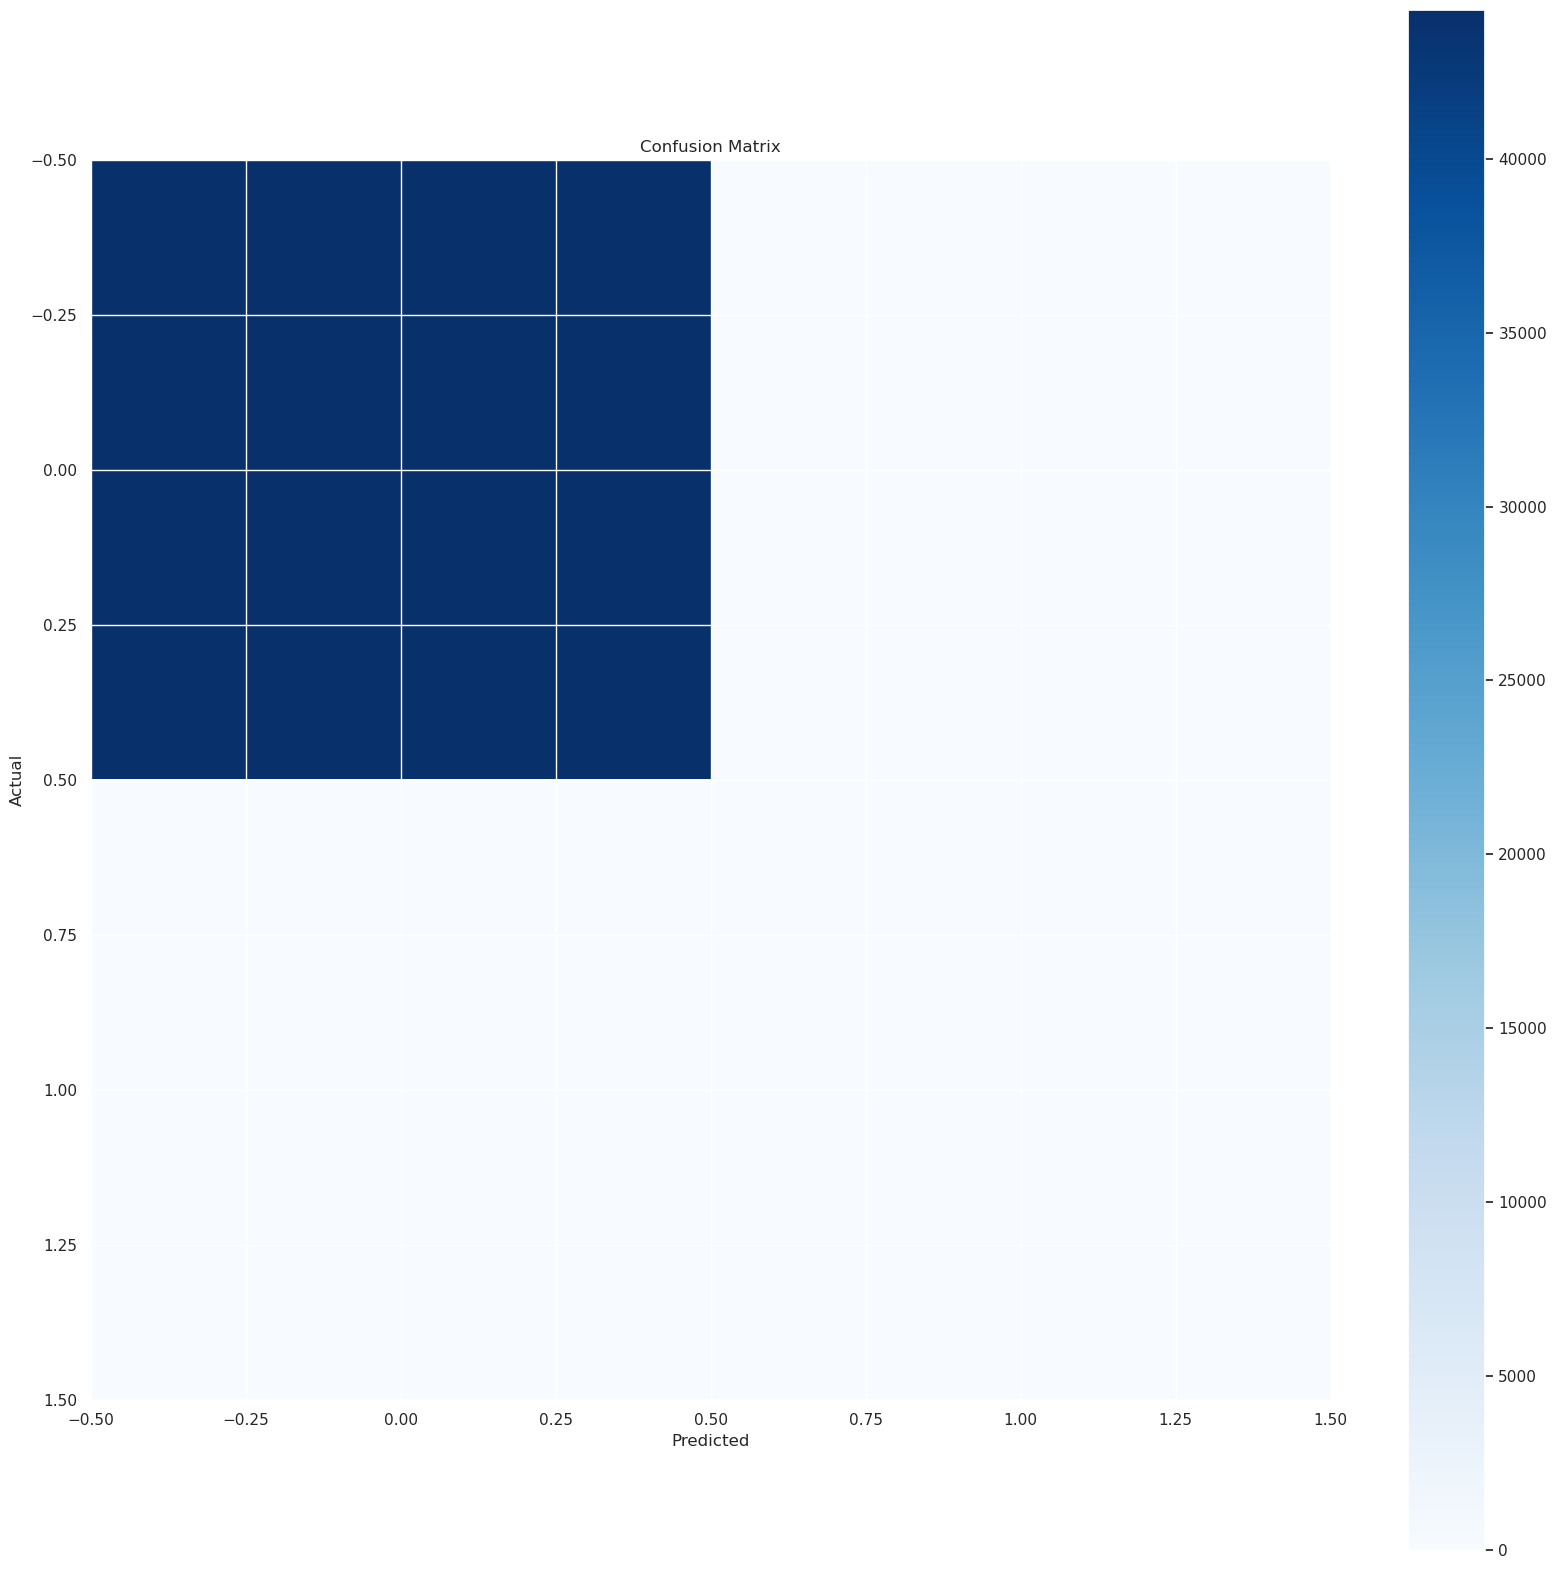

In [46]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

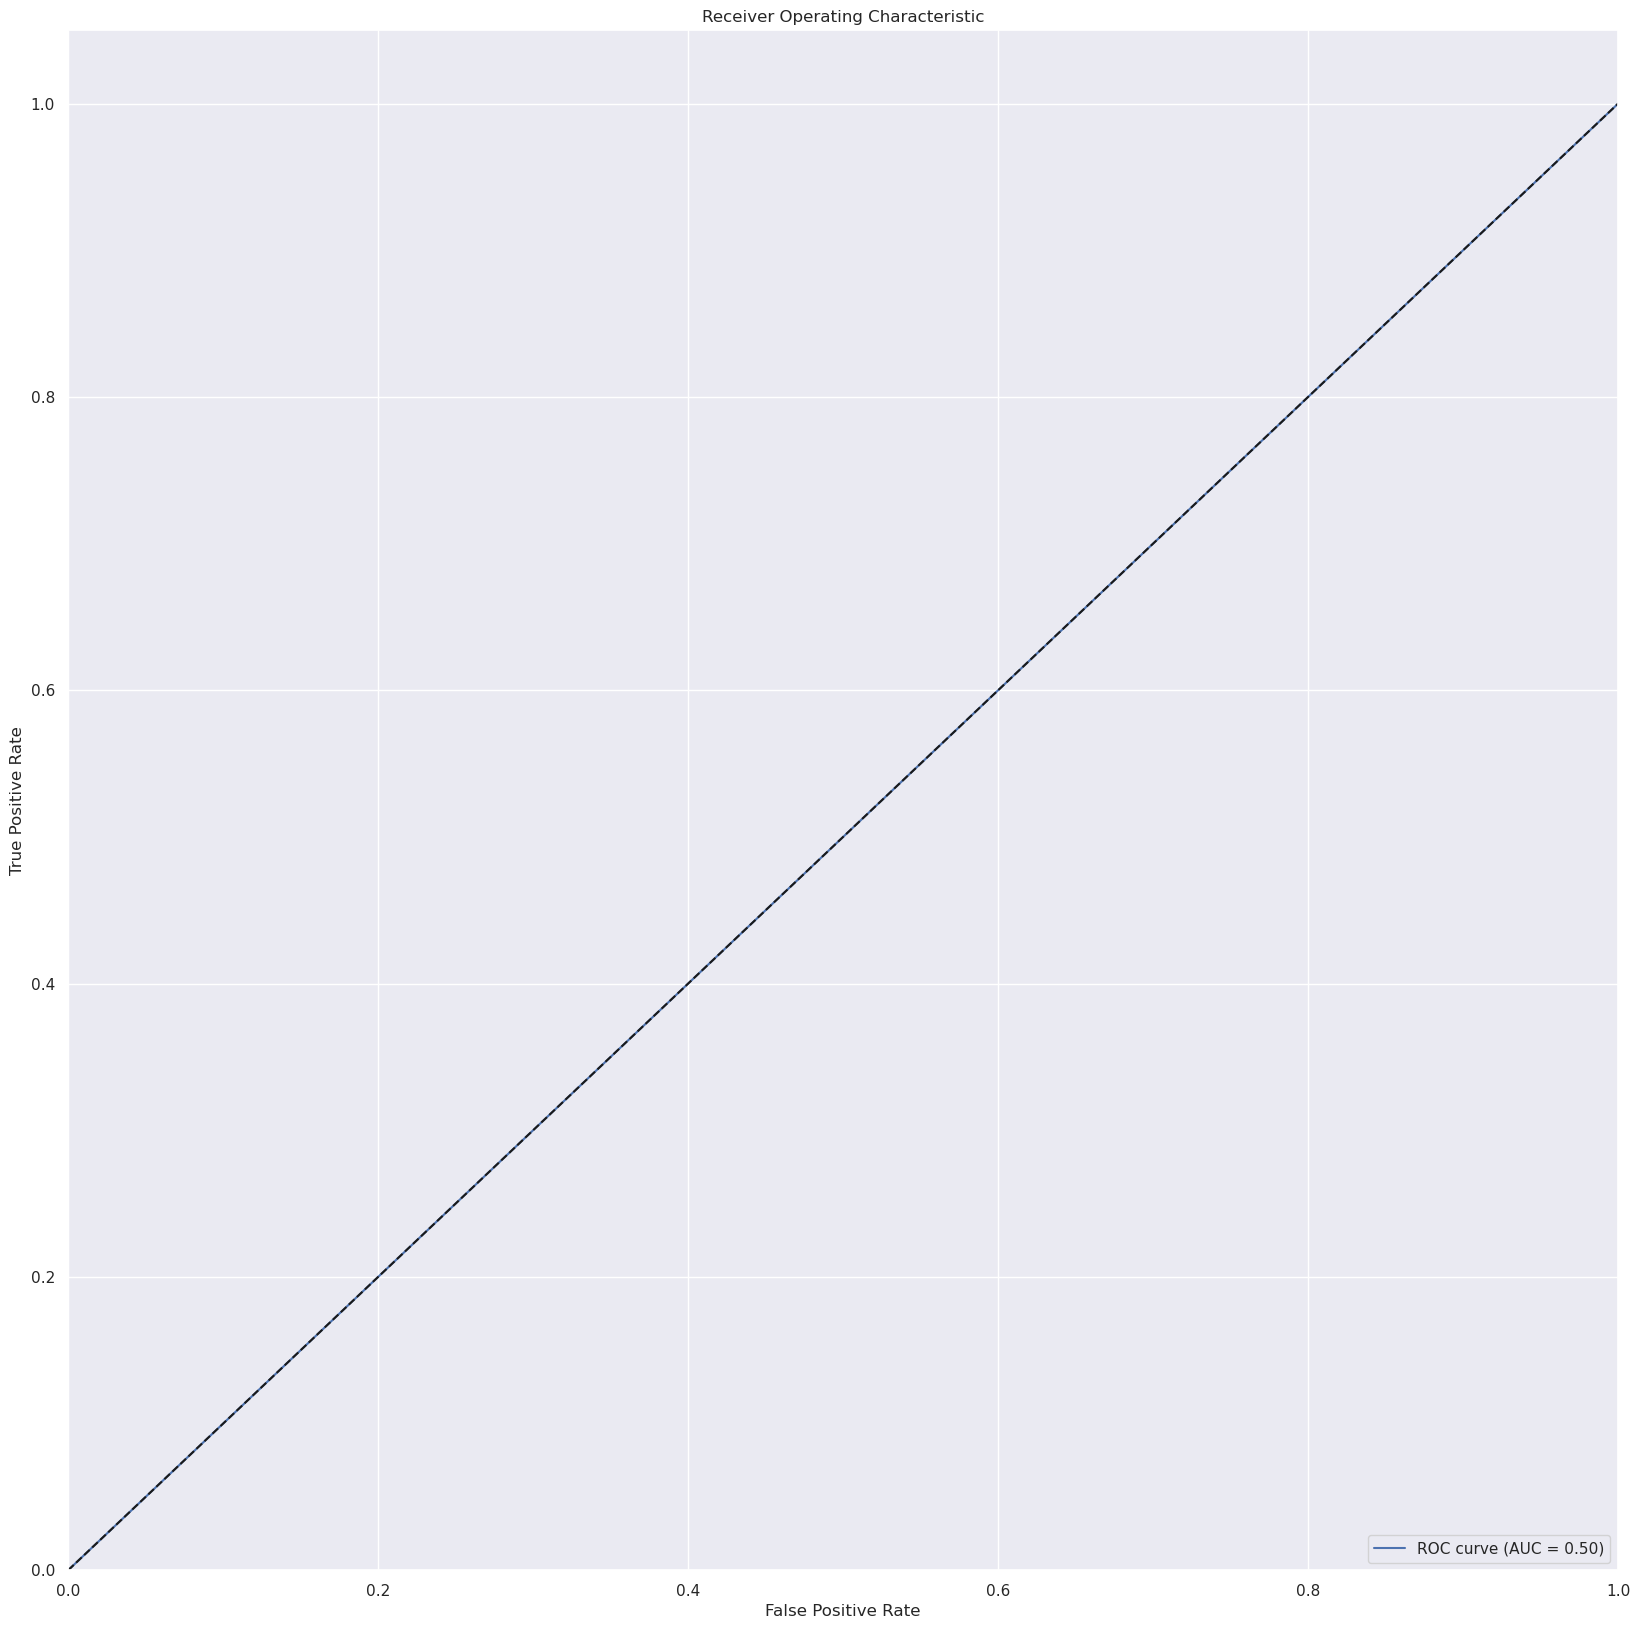

In [50]:
from sklearn.metrics import roc_curve, auc
# Getting the predicted probabilities for the positive class
y_scores = dummy.predict_proba(X_test_clean)[:, 1]

# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [51]:
#prints all relevant metrics of a model, this will be reused so we're defining it here
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [52]:
print_metrics(y_test, tree_test_preds)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.9989396263875101
F1 Score: 0.0


In [53]:
tree_features = list(zip(best_tree.feature_importances_, X_train.columns.values))
tree_features = sorted(tree_features, key=lambda x: x[0], reverse=True)
tree_features_values = [x[0] for x in tree_features][:4]
tree_features_names = [x[1] for x in tree_features][:4]

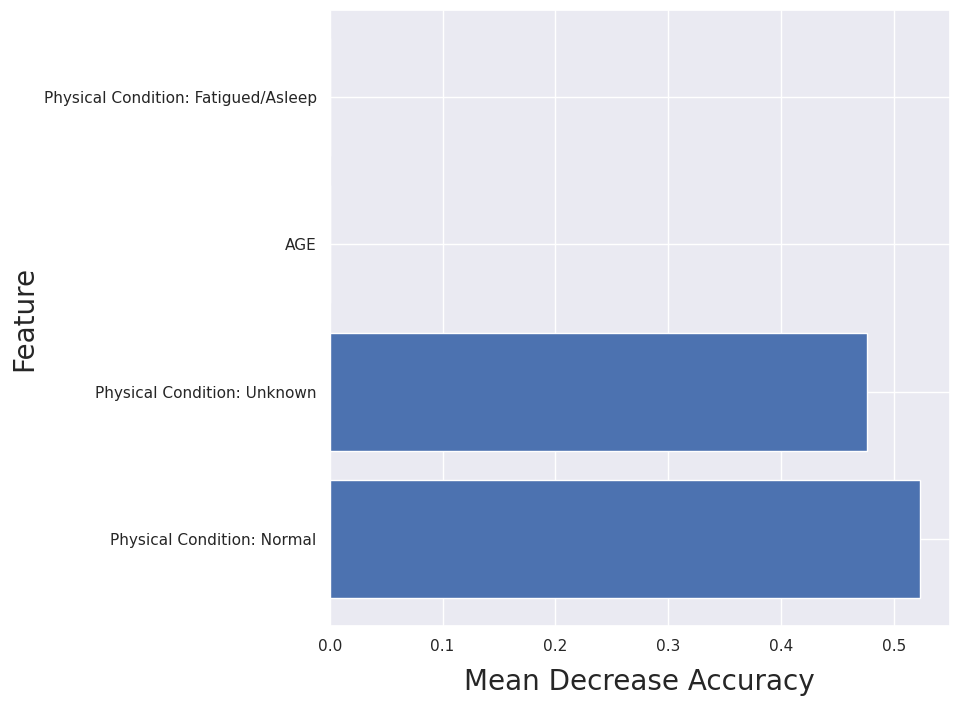

In [54]:
plt.figure(figsize=(8,8))
tree_labels = ['Physical Condition: Normal', 'Physical Condition: Unknown', 'AGE',
               'Physical Condition: Fatigued/Asleep']
plt.barh(tree_features_names, tree_features_values, align='center', tick_label=tree_labels)
plt.xlabel('Mean Decrease Accuracy', fontsize=20, labelpad=10)
plt.ylabel('Feature', fontsize=20)
plt.show()

In [55]:
tree_cv_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.196903,0.007938,0.006076,0.001567,2,4,2,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.998985,0.998985,0.998985,0.999013,0.998985,0.99899,0.000011,1
1,0.214661,0.037517,0.006051,0.001570,2,4,3,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.998985,0.998985,0.998985,0.999013,0.998985,0.99899,0.000011,1
2,0.201732,0.010561,0.006667,0.001248,2,4,4,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.998985,0.998985,0.998985,0.999013,0.998985,0.99899,0.000011,1
3,0.195531,0.005436,0.004836,0.000184,2,5,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.998985,0.998985,0.998985,0.999013,0.998985,0.99899,0.000011,1
4,0.203869,0.012931,0.004913,0.000376,2,5,3,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.998985,0.998985,0.998985,0.999013,0.998985,0.99899,0.000011,1


#### Conclusions

Both the baseline model and the decision tree compared, have nearly the same accuracy/best score values, means that the decision tree is not providing any better results, hence not an improvement to the previous baseline predictive model. Further, looking at the complexity of the decision tree model and its interpretation since it has got many stems. This makes the decision tree not to be a choice of the improvement model over the previous baseline model as it tends to be more heavily loaded in terms of data and interpretation as the baseline model.Therefore, both the models can be used in predicting interchangeably. 

Further, most accidents that occur are within the speed limiting zones, between 30-40 mph, broad day light and in a very good weather, jut to mention a few. Therefore, the problem seems to be with the drivers and the pedestrians, who might be neglecting the laws put in place to guide them as road users. Therefore, our client should be concerned with creation of awareness for the pedestrians and drivers to be protect not only themselves but other road users as well. This may mean involving the driving schools, reviewing the curriculum in place and is need be retrain all other drivers on road use and safety measures.

#### Recommendations
* As can be seen, most crashes do not take place due to some bad weather or bad roads or high speed but are just due to the negligence of the road users, motorists and pedestrians in equal measure. 
* There is need that drivers be on the lookout as they use the roads, particularly from thursday, through sunday. 
* The hours which are accident prone should have the police officers being able to manage drivers and ensure that traffic rules are not broken. 
* There should be a fixed speed limit between Thursday to Sunday as well as during the day time and early night as most of the car crashes happens within these periods.
